In [17]:
import numpy as np
from dppy.finite_dpps import FiniteDPP
from dppy.utils import example_eval_L_linear
from constructionPsi import getpsi, compute_pertinence, similarity
from utils import getFilenameAtPosition, getDateFromFilename, getSoundAtPosition
from affichageDonnees import displayPolarSamples


In [20]:
PSI = getpsi()

#DPP = FiniteDPP('likelihood', **{'L': L})
DPP = FiniteDPP('likelihood', **{'L_eval_X_data': (example_eval_L_linear , PSI)})

# Sample
K = 20
samples = []

samples = DPP.sample_exact_k_dpp(size=K)

print(samples)


loading psi from persisted file
L (likelihood) kernel computed via:
- L = eval_L(X_data, X_data)
[284, 118, 181, 301, 30, 413, 133, 357, 1, 332, 258, 414, 191, 175, 12, 286, 114, 431, 111, 236]


C:\Users\pierr\anaconda3\lib\site-packages\dppy\finite_dpps.py:909: UserWarning: Weird setting:
FiniteDPP(.., **{"L_eval_X_data": (eval_L, X_data)})
When using "L_eval_X_data", you are a priori working with a big `X_data` and not willing to compute the full likelihood kernel L
Right now, the computation of L=eval_L(X_data) is performed but might be very expensive, this is at your own risk!
You might also use FiniteDPP(.., **{"L": eval_L(X_data)})
  warn('\n'.join(warn_print))


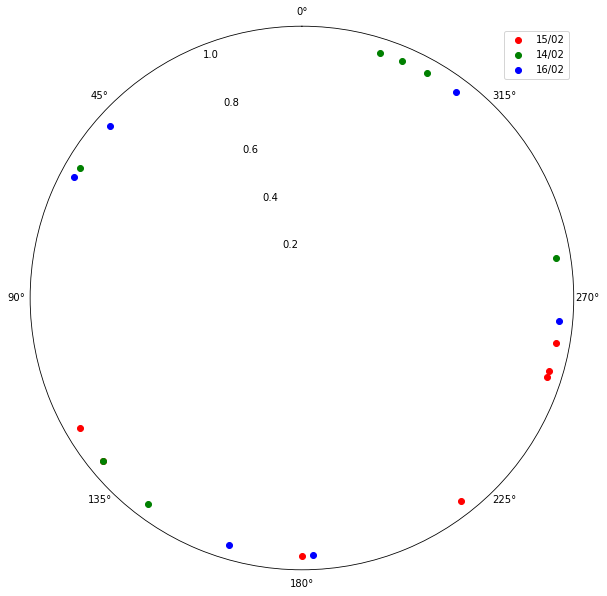

[0.9925733, 0.8265365, 0.5812744, 0.9979186, 0.9562822, 0.97530425, 0.97516584, 0.6825713, 0.8054104, 0.9492355, 0.81903934, 0.9768649, 0.1889966, 0.9540722, 0.9815739, 0.96095157, 0.9883196, 0.9684616, 0.93602526, 0.9077738]
0.87121755
['15/02/2016 23:20', '14/02/2016 19:40', '15/02/2016 06:10', '16/02/2016 02:10', '14/02/2016 05:00', '16/02/2016 20:50', '14/02/2016 22:10', '16/02/2016 11:30', '14/02/2016 00:10', '16/02/2016 07:20', '15/02/2016 19:00', '16/02/2016 21:00', '15/02/2016 07:50', '15/02/2016 05:10', '14/02/2016 02:00', '15/02/2016 23:40', '14/02/2016 19:00', '16/02/2016 23:50', '14/02/2016 18:30', '15/02/2016 15:20']


In [21]:
root = './SoundDatabase'
dates = []
filenames = []
pertinences = []

for sample in samples:
    filename = getFilenameAtPosition(root, sample) 
    filenames.append(filename)
    date = getDateFromFilename(filename, with_root = True, root = root)
    dates.append(date)

    sound, fe = getSoundAtPosition(root, sample, 5)
    pertinence = compute_pertinence(sound, fe)
    pertinences.append(pertinence)
   

displayPolarSamples(filenames)
print(pertinences)
print(np.mean(pertinences))

print(dates)

psi = getpsi()
similarities = 0
nbSamples = len(samples)
for j in range(0, nbSamples):
    for i in range(0, j):
        similarities += similarity(samples[j], samples[i], psi)

similarities /= nbSamples * (nbSamples - 1) / 2

